In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [88]:
data=pd.read_csv("data\data_hotel_booking.csv")

In [89]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [90]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [92]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [93]:
data.duplicated().value_counts()

False    87396
True     31994
Name: count, dtype: int64

In [94]:
data.drop_duplicates(inplace=True)

In [95]:
data.duplicated().sum()

0

In [96]:
for i in data.columns:
    null_percentage=(data[i].isnull().sum()/ len(data) * 100)
    if null_percentage > 0:
        print(f"column '{i}' percentage of null values in: {null_percentage:.4f}%")

column 'children' percentage of null values in: 0.0046%
column 'country' percentage of null values in: 0.5172%
column 'agent' percentage of null values in: 13.9514%
column 'company' percentage of null values in: 93.9826%


In [97]:
data.drop(columns="company",axis=1,inplace=True)

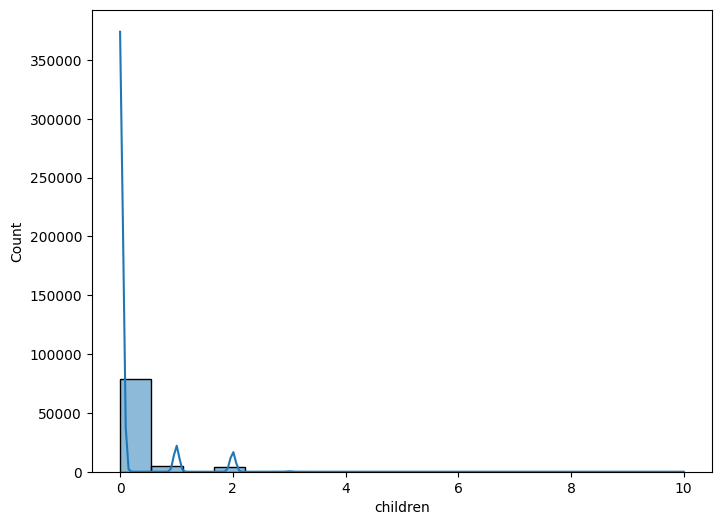

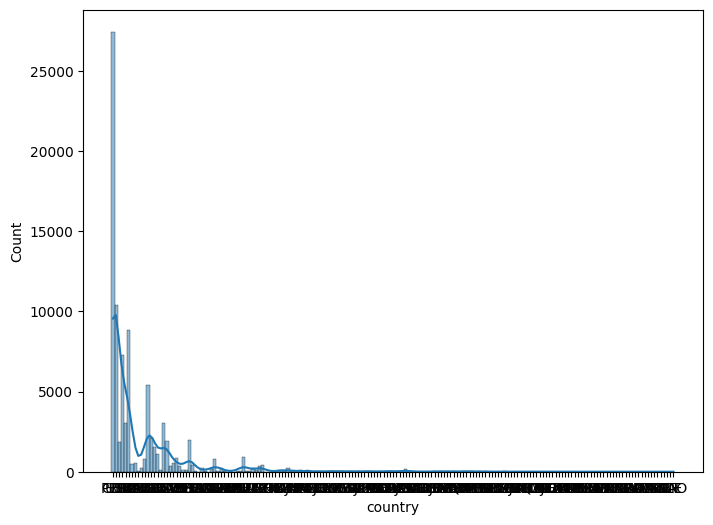

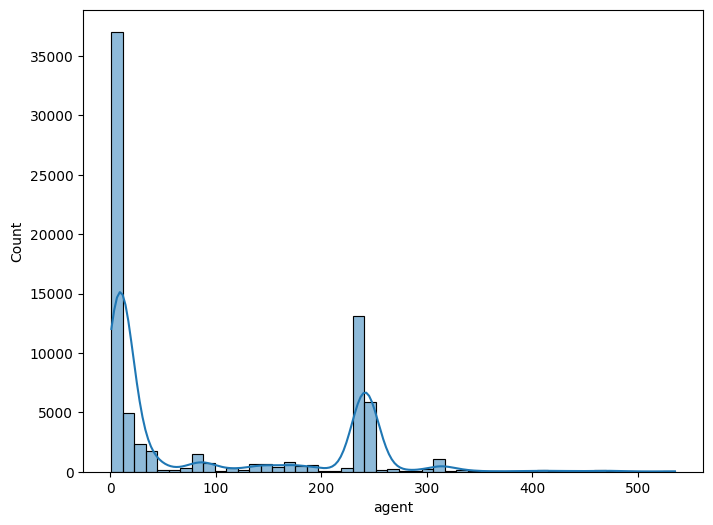

In [98]:
liste=["children","country","agent"]
for i in data[liste]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data,x=data[i],kde=True)
    plt.show()


In [99]:
print(f"{data['country'].isna().sum()} missing values for country")
print(f"{data['agent'].isna().sum()} missing values for agent")
print(f"{data['children'].isna().sum()} missing values for children")

452 missing values for country
12193 missing values for agent
4 missing values for children


In [100]:
data.dropna(axis=0,inplace=True)

In [101]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [102]:
data.describe(include="O")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074
unique,2,12,5,174,7,4,8,10,3,4,3,923
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-03-28
freq,47836,10210,56826,19596,51216,67850,47615,40217,74193,62487,52612,183


In [103]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000
mean,0.299198,86.919133,2016.225524,26.919799,15.797720,1.070237,2.750939,1.924581,0.148893,0.010510,0.014626,0.019687,0.032888,0.248208,93.932467,0.810241,110.200765,0.072142,0.739430
std,0.457910,85.956180,0.682746,13.362889,8.845067,1.032594,2.042816,0.519042,0.471500,0.113359,0.120049,0.316177,0.508998,0.698086,113.111664,10.573689,54.386390,0.260214,0.832635
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,76.000000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,101.650000,0.000000,1.000000
75%,1.000000,134.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,136.842500,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [104]:
numerical_columns=["lead_time",
                   "arrival_date_year",
                   "arrival_date_week_number",
                   "arrival_date_day_of_month",
                   "stays_in_weekend_nights",
                   "stays_in_week_nights",
                   "adults",
                   "children",
                   "babies",
                   "is_repeated_guest",
                   "previous_cancellations",
                   "previous_bookings_not_canceled",
                   "booking_changes",
                   "agent",
                   "days_in_waiting_list",
                   "adr",
                   "required_car_parking_spaces",
                   "total_of_special_requests"]

categorical_columns=["hotel",
                     "arrival_date_month",
                     "meal",
                     "country",
                     "market_segment",
                     "distribution_channel",
                     "reserved_room_type",
                     "assigned_room_type",
                     "deposit_type",
                     "customer_type",
                     "reservation_status",
                     "reservation_status_date"]

In [107]:
print("Size before removing outlier samples: " + str(len(data[numerical_columns])))
data = data[(np.abs(stats.zscore(data[numerical_columns])) < 3).all(axis=1)]
print("Size after removing outlier samples: " + str(len(data[numerical_columns])))

Size before removing outlier samples: 75074
Size after removing outlier samples: 60061


In [108]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.50,0,0,Canceled,2015-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
